In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [4]:
# intersection of two lines (represented as two points (which are represented as pairs of numbers))

class Point:
    x = 0
    y = 0

Point().x, Point().y

(0, 0)

# Intersection of Two Lines

In [35]:
# https://stackoverflow.com/questions/563198/how-do-you-detect-where-two-line-segments-intersect

# the intersection of two lines is a type cohomology 
# it is the intersection of two elements of H^1(R^3), which is an element of H^1(R^3)

def intersect(  ((a,b), (c,d)), ((e,f),(g,h))  ):
    p = (a,b)
    q = (e,f)
    r = (c-a,d-b)
    s = (g-e,h-f)
    
    area1 = r[0]*s[1] - r[1]*s[0]
    area2 = (q[0]-p[0])*r[1] - (q[1]-p[1])*r[0]
    area3 = (q[0]-p[0])*s[1] - (q[1]-p[1])*s[0]
    
    pt1 = ( p[0] + (area3/area1)*r[0] , p[1] + (area3/area1)*r[1] )
    
    pt2 = ( q[0] + (area2/area1)*s[0] , q[1] + (area2/area1)*s[1] )
    
    #print area1, area2, area3
    
    return (pt1, pt2), (area3/area1, area2/area1)

In [36]:
line1 = ((-1.0,0.5), (1.0,0.5))

line2 = ((0.0,1.0), (0.0,-1.0))

intersect(line1, line2)

(((0.0, 0.5), (0.0, 0.5)), (0.5, 0.25))

In [37]:
line1 = ((-1.0,2), (1.0,2))

line2 = ((0.0,1.0), (0.0,-1.0))

intersect(line1, line2)

(((0.0, 2.0), (0.0, 2.0)), (0.5, -0.5))

In [38]:
line1 = ((0.0,0.0), (1.0,1.0))

line2 = ((0.0,1.0), (1.0,0.0))

intersect(line1, line2)

(((0.5, 0.5), (0.5, 0.5)), (0.5, 0.5))

# Distance from Point to Line Segment 

In [41]:
def dist (  (a,b) , (c,d) ):
    return ((c-a)**2 + (b-d)**2)**0.5

# Midterm

In [39]:
pt = [ (np.cos(2.0*np.pi*k/5), np.sin(2.0*np.pi*k/5))  for k in range(5)] 

polygon = [ (pt[k], pt[(k+1)%5]) for k in range(5) ]

polygon

[((1.0, 0.0), (0.30901699437494745, 0.95105651629515353)),
 ((0.30901699437494745, 0.95105651629515353),
  (-0.80901699437494734, 0.58778525229247325)),
 ((-0.80901699437494734, 0.58778525229247325),
  (-0.80901699437494756, -0.58778525229247303)),
 ((-0.80901699437494756, -0.58778525229247303),
  (0.30901699437494723, -0.95105651629515364)),
 ((0.30901699437494723, -0.95105651629515364), (1.0, 0.0))]

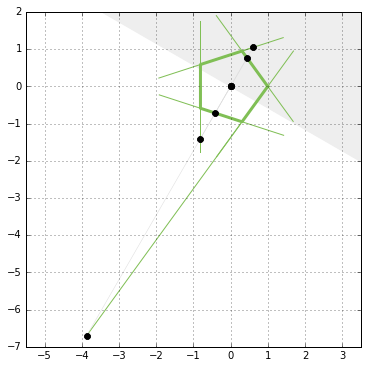

In [149]:
P = 10j*np.exp(4.0j*np.pi/3)*np.array([0, 1, 1+1j, -1 + 1j, -1, 0])

plt.fill(P.real, P.imag, '-', color="#EEEEEE")

plt.plot( [pt[(k%5)][0] for k in range(6)], [pt[(k%5)][1] for k in range(6)], '-', color="#80BF55", linewidth=3 )

t = np.arange(-1,2,0.01)
for k in range(5):
    z = (pt[k][0] + pt[k][1]*1j)*t + (pt[(k+1)%5][0] + pt[(k+1)%5][1]*1j)*(1-t)
    plt.plot( z.real, z.imag , '-', color="#80BF55", linewidth=1  )

X = []

x = (0,0)
theta = np.pi/3
line0 = ( x, (x[0] + 0.01*np.cos(theta) , x[1] + 0.01*np.sin(theta) ) )

t = np.arange(0,1,0.01)
for k in range(5):
    
    y = intersect( line0 , polygon[k] )[0][0]
    
    
    z = (pt[k][0] + pt[k][1]*1j)*t + (y[0] + 1j*y[1])*(1-t)
    plt.plot( z.real, z.imag , '-', color="#80BF55", linewidth=1  )

    plt.plot( [x[0], y[0]], [x[1],y[1]], '-', color='#DDDDDD', linewidth=0.5)
    plt.plot( [x[0], y[0]], [x[1],y[1]], 'ko')

for k in range(5):
    
    y = intersect( line0 , polygon[k] )[0][0]
    plt.plot( [x[0], y[0]], [x[1],y[1]], 'ko')

plt.axis("Equal")
plt.grid(True)
plt.xticks(np.arange(9) - 5)
plt.xlim([-5.5,3.5])
plt.ylim([-7,2])
plt.show()

# Billiards

In [150]:
pt = [ (np.cos(2.0*np.pi*k/5), np.sin(2.0*np.pi*k/5))  for k in range(5)] 

polygon = [ (pt[k], pt[(k+1)%5]) for k in range(5) ]

polygon

[((1.0, 0.0), (0.30901699437494745, 0.95105651629515353)),
 ((0.30901699437494745, 0.95105651629515353),
  (-0.80901699437494734, 0.58778525229247325)),
 ((-0.80901699437494734, 0.58778525229247325),
  (-0.80901699437494756, -0.58778525229247303)),
 ((-0.80901699437494756, -0.58778525229247303),
  (0.30901699437494723, -0.95105651629515364)),
 ((0.30901699437494723, -0.95105651629515364), (1.0, 0.0))]

In [235]:
X = []

x = (0,0)
X += [x]
theta = np.pi/3
line0 = ( x, (x[0] + 0.01*np.cos(theta) , x[1] + 0.01*np.sin(theta) ) )

c = -1
for t in range(2500):
    d = -1
    minDistance = 10
    for k in range(5):
        #print k, intersect(line0, polygon[k])[1][0], dist(x, intersect(line0, polygon[k])[0][0] )
        
        P = intersect(line0, polygon[k])
        
        if P[1][0] > 0:
            if dist(x, P[0][0] ) < minDistance:
                if k != c:
                    d = k
                    minDistance = dist(x, P[0][0] )
    c = d

    x = intersect(line0, polygon[c])[0][0]
    X += [x]
    theta = theta - 2*( theta - 2*np.pi*(c+0.5)/5 ) + np.pi
    line0 = ( x, (x[0] + 0.01*np.cos(theta) , x[1] + 0.01*np.sin(theta) ) )
    
    #print
    #print

X += [ ( X[-1][0] + 0.1*np.cos(theta) , X[-1][1] + 0.1*np.sin(theta) )]

#c, X, theta

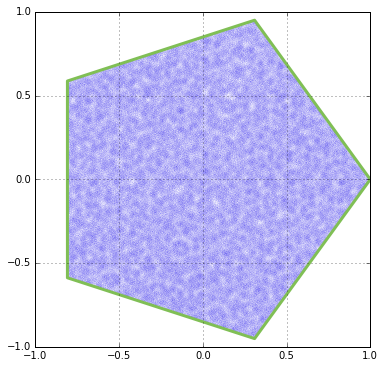

In [237]:
plt.plot( [x[0] for x in X], [x[1] for x in X], '-', color='#4136EB', linewidth=0.05)

plt.plot( [pt[(k%5)][0] for k in range(6)], [pt[(k%5)][1] for k in range(6)], '-', color="#80BF55", linewidth=3 )

plt.grid(True)